In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/data/4h_backtest_btc_df.csv"

In [3]:
import pandas as pd
from backtester import Backtester, MLStrategy
from strategies.simpleML_stragies import SimpleCatBoost

strategy_class = SimpleCatBoost

initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_csv(EXCEL_PATH)
xls.drop_duplicates(inplace=True)


In [4]:
xls

,timestamp,price,future_2d_log_return,prediction_btc,prediction_btc_5
0,2023-05-30 00:00:00+00:00,1.457728e+11,-0.009300,1,1
1,2023-06-01 00:00:00+00:00,1.448139e+11,-0.012699,0,1
2,2023-06-03 00:00:00+00:00,1.429865e+11,0.004900,0,0
3,2023-06-05 00:00:00+00:00,1.436888e+11,0.003100,0,0
4,2023-06-07 00:00:00+00:00,1.441349e+11,-0.002700,1,1
...,...,...,...,...,...
390,2025-07-18 00:00:00+00:00,3.322899e+11,-0.016499,0,1
391,2025-07-20 00:00:00+00:00,3.268524e+11,-0.051897,0,0
392,2025-07-22 00:00:00+00:00,3.103222e+11,0.049898,1,1
393,2025-07-24 00:00:00+00:00,3.261993e+11,-0.031498,1,0


In [5]:
xls.set_index("timestamp", inplace=True)

In [6]:
xls.columns

Index(['price', 'future_2d_log_return', 'prediction_btc', 'prediction_btc_5'], dtype='object')

Columns in 'xls' DataFrame before backtesting: ['price', 'future_2d_log_return', 'prediction_btc', 'prediction_btc_5']

📊 Performance Report for price
total_net_return: 17.924296398638347
annualized_return: 5.558039797497308
sharpe: 4.139449898922037
max_drawdown: -0.30579081959466126
avg_trade_return: nan
median_trade_return: nan
avg_trade_return_long: nan
median_trade_return_long: nan
avg_trade_return_short: nan
median_trade_return_short: nan
skewness: nan
num_trades: 318
total_fees_paid: 0.12720000000000004
fees_as_pct_of_gross: 4.146501072234807


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


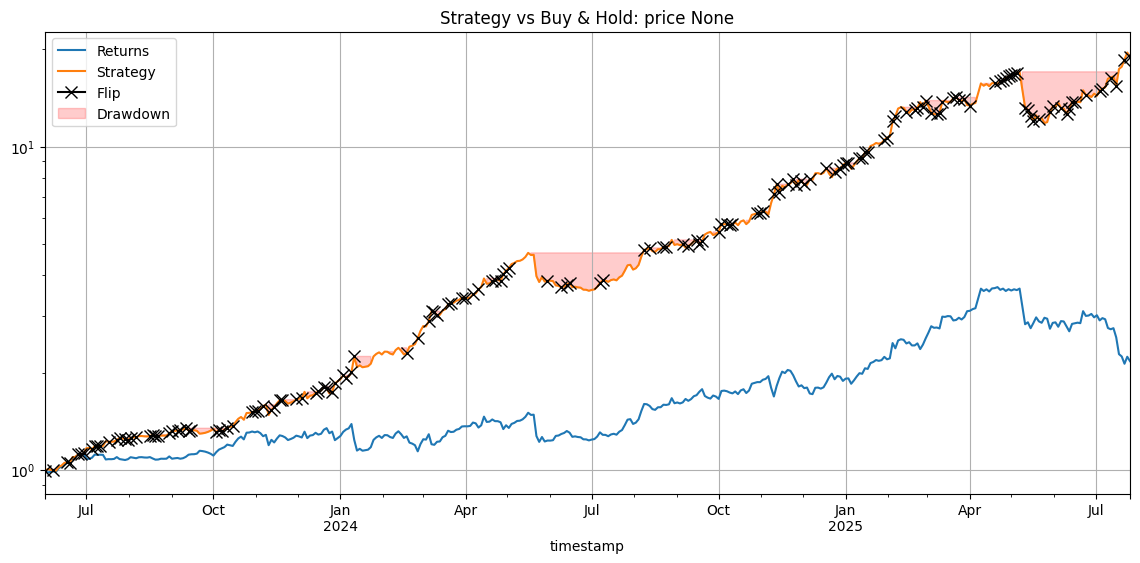

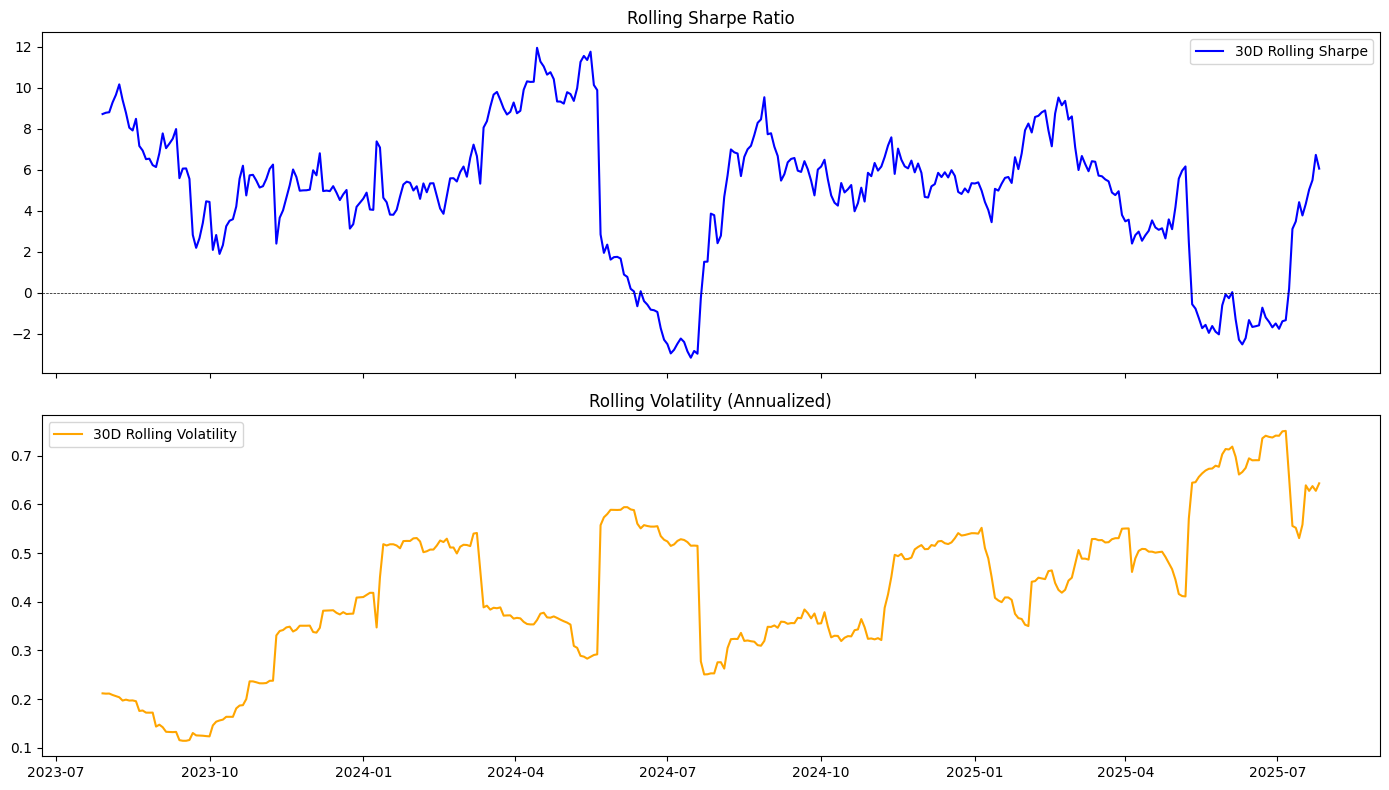


Worst Drawdowns:
                       start                    trough  \
46 2025-05-07 00:00:00+00:00 2025-05-25 00:00:00+00:00   
23 2024-05-16 00:00:00+00:00 2024-06-29 00:00:00+00:00   
42 2025-02-28 00:00:00+00:00 2025-03-06 00:00:00+00:00   
15 2024-01-11 00:00:00+00:00 2024-01-17 00:00:00+00:00   
10 2023-11-08 00:00:00+00:00 2023-11-10 00:00:00+00:00   

                         end  length_days  depth_pct  recovery_days  
46 2025-07-18 00:00:00+00:00           72     -30.58             54  
23 2024-08-08 00:00:00+00:00           84     -23.66             40  
42 2025-03-20 00:00:00+00:00           20      -9.32             14  
15 2024-01-25 00:00:00+00:00           14      -7.42              8  
10 2023-11-16 00:00:00+00:00            8      -7.10              6  


In [7]:
print("Columns in 'xls' DataFrame before backtesting:", xls.columns.tolist())

# Create an instance of the MLStrategy
ml_strategy = MLStrategy(prediction_column='prediction_btc')

# Initialize and run the backtester
bt = Backtester(xls, ml_strategy)
bt.run()

# Generate your full report
bt.generate_report()